<a href="https://colab.research.google.com/github/Mayshro/Suicide_Project/blob/main/Kaggale_Ptroject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1- Importing the original suicide data set and renaming the columns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [3]:
data1 = data1.drop(columns=['HDI for year'])

In [4]:
data

,id,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18078,Norway,2003,female,35-54 years,45,629033,Norway2003,NaN,"228,752,436,372",53533,Boomers
18079,18079,Norway,2003,female,25-34 years,22,321320,Norway2003,NaN,"228,752,436,372",53533,Generation X
18080,18080,Norway,2003,female,15-24 years,17,269608,Norway2003,NaN,"228,752,436,372",53533,Millenials
18081,18081,Norway,2003,female,75+ years,11,220907,Norway2003,NaN,"228,752,436,372",53533,Silent


In [5]:
data.head()

,id,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,Albania1987,NaN,"2,156,624,900",796,Boomers


Countries
The original data set contains data from more than 100 countries during 1985-2016. I've decided to limit the number of countries to make the analysis more insightful. I've chosen 40 countries from different parts of the world that I believe are a good sample of the different regions.

In [6]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

In [7]:
countrynames = list(data['country'].unique())
countrynames

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway']

Also, the extra data from the WDI database was only available for 1995-2013, so I decided to limit the data to this time period.

In [8]:
df1 = data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

Exploratory Data Analysis

Text(0.5, 0, 'Suicides per 100K')

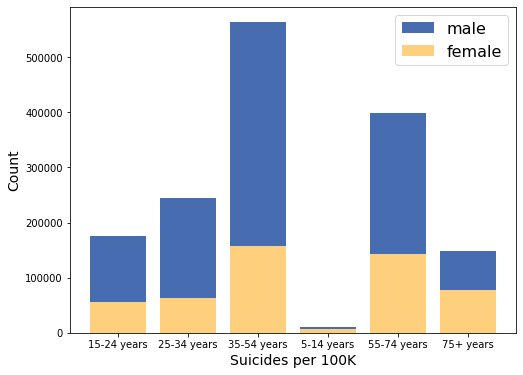

In [9]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())


agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 72 to 18082
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12263 non-null  int64  
 1   country             12263 non-null  object 
 2   year                12263 non-null  int64  
 3   sex                 12263 non-null  object 
 4   age                 12263 non-null  object 
 5   suicides_no         12263 non-null  int64  
 6   population          12263 non-null  int64  
 7   country-year        12263 non-null  object 
 8   HDI for year        4284 non-null   float64
 9    gdp_for_year ($)   12263 non-null  object 
 10  gdp_per_capita ($)  12263 non-null  int64  
 11  generation          12263 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ MB


In [11]:
(df1["HDI for year"].isnull().sum() / data.shape[0]) *100

68.9432063263839

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083 entries, 0 to 18082
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18083 non-null  int64  
 1   country             18083 non-null  object 
 2   year                18083 non-null  int64  
 3   sex                 18083 non-null  object 
 4   age                 18083 non-null  object 
 5   suicides_no         18083 non-null  int64  
 6   population          18083 non-null  int64  
 7   country-year        18083 non-null  object 
 8   HDI for year        5616 non-null   float64
 9    gdp_for_year ($)   18083 non-null  object 
 10  gdp_per_capita ($)  18083 non-null  int64  
 11  generation          18083 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.7+ MB


In [13]:
data.isnull().sum()

id                        0
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
country-year              0
HDI for year          12467
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Text(0.5, 1.0, 'Top 10 countries')

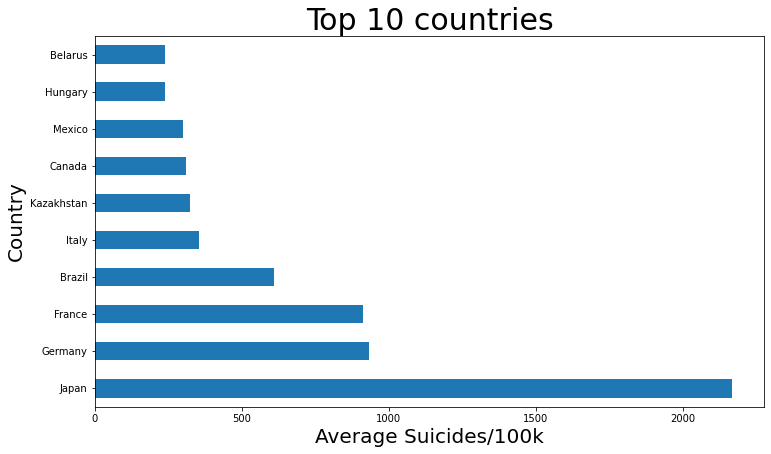

In [14]:
plt.figure(figsize=(12, 15))


plt.subplot(211)
data.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh')
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

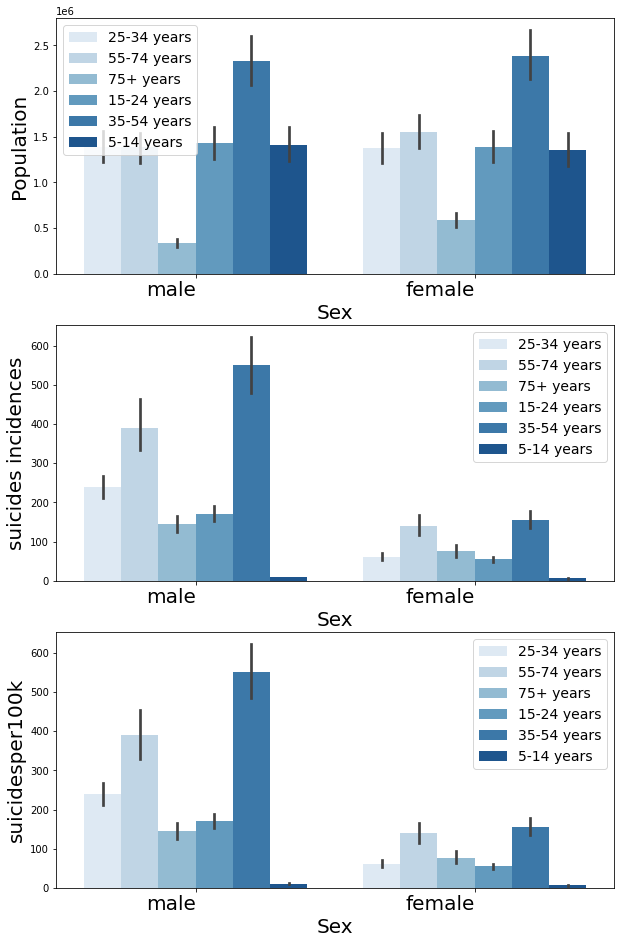

In [15]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicides_no', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

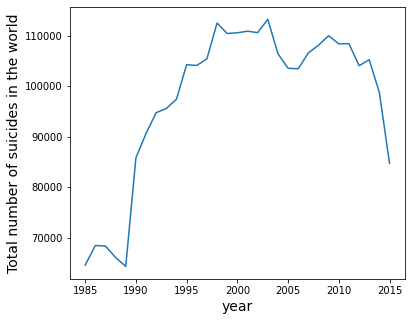

In [16]:
year = data.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(data.groupby('year').suicides_no.sum())

plt.plot(year.index[0:31], totalpyear[0:31])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Text(0, 0.5, 'count')

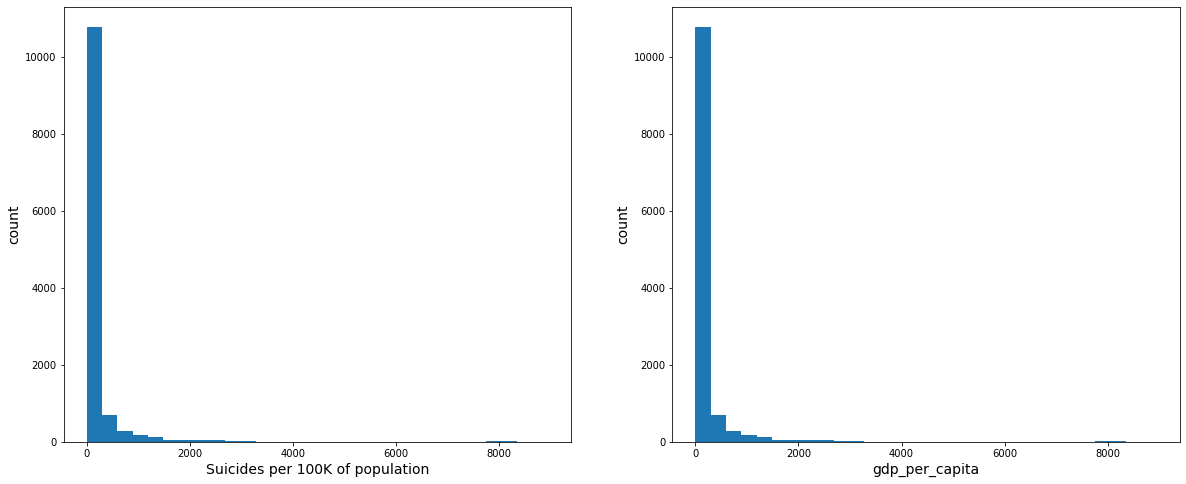

In [17]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.suicides_no, bins=30)
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.suicides_no, bins=30)
plt.xlabel('gdp_per_capita', fontsize=14)
plt.ylabel('count', fontsize=14)


From all the extra features added from the WDI database, I'm using 11 features for exploring. These are basically the features with fewer null values.
totalfeatures: 'country', 'year','gdp_for_year ($)',gdp_per_capita ($)'.
I'm aslo lifting the fine subsample level of sex and age group. I'm creating a new pandas data frame "total", with a new column "suicides" as the total value of sucides_no of population per country per year, calculated by summing over both sexes and age groups.

In [18]:
countrynames = list(df['country'].unique())

In [19]:
features = ['country', 'year',' gdp_for_year ($) ',
           'gdp_per_capita ($)']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total['Suicides'] = df[['country', 'year', 'suicides_no']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicides_no']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

In [20]:
total

,year,gdp_per_capita ($),Suicides,population,country
0,1995,835.0,88,4055900.0,Albania
1,1996,1127.0,89,4078000.0,Albania
2,1997,793.0,170,4102100.0,Albania
3,1998,899.0,154,4129400.0,Albania
4,1999,1127.0,139,4159745.0,Albania
...,...,...,...,...,...
1017,1999,39013.0,583,NaN,Norway
1018,2000,41099.0,541,NaN,Norway
1019,2001,41281.0,549,NaN,Norway
1020,2002,46049.0,494,NaN,Norway


In [21]:
totalfeatures = ['country', 'year', 'gdp_for_year($)', 'gdp_per_capita($)']

In [22]:
df['country'].value_counts()

Finland                   228
France                    228
Lithuania                 228
Czech Republic            228
Denmark                   228
                         ... 
Norway                    107
Kiribati                   84
Nicaragua                  48
Bosnia and Herzegovina     12
Cabo Verde                 12
Name: country, Length: 62, dtype: int64

In [23]:
total.columns

Index(['year', 'gdp_per_capita ($)', 'Suicides', 'population', 'country'], dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'GDP')

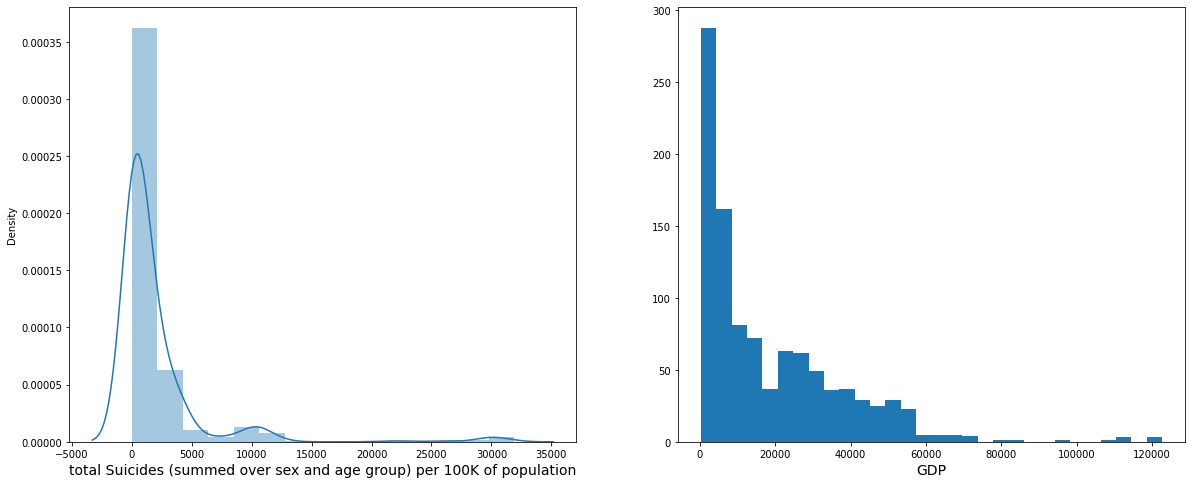

In [24]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total['gdp_per_capita ($)'], bins=30)
plt.xlabel('GDP', fontsize=14)

In [25]:
df.columns

Index(['id', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [26]:
df = df.drop(columns=['HDI for year'])

In [27]:
df.columns

Index(['id', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 72 to 18082
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  12263 non-null  int64 
 1   country             12263 non-null  object
 2   year                12263 non-null  int64 
 3   sex                 12263 non-null  object
 4   age                 12263 non-null  object
 5   suicides_no         12263 non-null  int64 
 6   population          12263 non-null  int64 
 7   country-year        12263 non-null  object
 8    gdp_for_year ($)   12263 non-null  object
 9   gdp_per_capita ($)  12263 non-null  int64 
 10  generation          12263 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.4+ MB


Calculating the correlation matrix for all chosen features:

<ipython-input-29-1755bcf9bb97>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


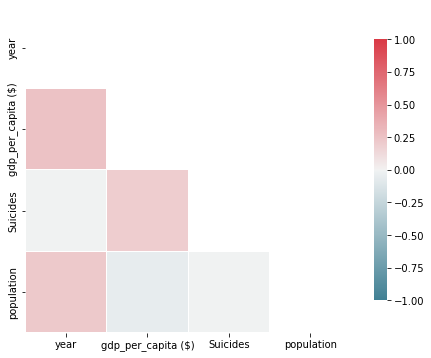

In [29]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

Binary classification for suicide risk
I decided to perform a binary classification on the suicide data, by assigning risk classes based on the suicide incidences per sucides_no of the population as high/low suicide risk. Adding an extra column to the "total" data frame as 'risk'.
Suicides<mean(Suicides) --> low risk --> class 0Suicides>mean(Suicides) --> high risk --> class 1

In [30]:
total

,year,gdp_per_capita ($),Suicides,population,country
0,1995,835.0,88,4055900.0,Albania
1,1996,1127.0,89,4078000.0,Albania
2,1997,793.0,170,4102100.0,Albania
3,1998,899.0,154,4129400.0,Albania
4,1999,1127.0,139,4159745.0,Albania
...,...,...,...,...,...
1017,1999,39013.0,583,NaN,Norway
1018,2000,41099.0,541,NaN,Norway
1019,2001,41281.0,549,NaN,Norway
1020,2002,46049.0,494,NaN,Norway


In [31]:
total['risk'] = total.Suicides.copy()

total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Suicides')

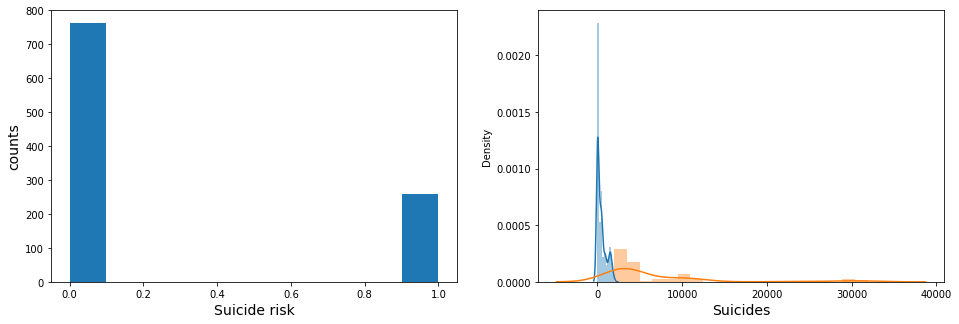

In [32]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk)
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.risk == 0], bins=10)
sns.distplot(total.Suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

In [33]:
df.head()

,id,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),generation
72,72,Albania,1995,male,25-34 years,13,232900,Albania1995,"2,424,499,009",835,Generation X
73,73,Albania,1995,male,55-74 years,9,178000,Albania1995,"2,424,499,009",835,Silent
74,74,Albania,1995,female,75+ years,2,40800,Albania1995,"2,424,499,009",835,G.I. Generation
75,75,Albania,1995,female,15-24 years,13,283500,Albania1995,"2,424,499,009",835,Generation X
76,76,Albania,1995,male,15-24 years,11,241200,Albania1995,"2,424,499,009",835,Generation X


In [34]:
#drop  age ,country-year

In [35]:
df.drop(columns=['age','country-year'],inplace=True)

In [36]:
df.head()

,id,country,year,sex,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
72,72,Albania,1995,male,13,232900,"2,424,499,009",835,Generation X
73,73,Albania,1995,male,9,178000,"2,424,499,009",835,Silent
74,74,Albania,1995,female,2,40800,"2,424,499,009",835,G.I. Generation
75,75,Albania,1995,female,13,283500,"2,424,499,009",835,Generation X
76,76,Albania,1995,male,11,241200,"2,424,499,009",835,Generation X


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 72 to 18082
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  12263 non-null  int64 
 1   country             12263 non-null  object
 2   year                12263 non-null  int64 
 3   sex                 12263 non-null  object
 4   suicides_no         12263 non-null  int64 
 5   population          12263 non-null  int64 
 6    gdp_for_year ($)   12263 non-null  object
 7   gdp_per_capita ($)  12263 non-null  int64 
 8   generation          12263 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [38]:
df.columns

Index(['id', 'country', 'year', 'sex', 'suicides_no', 'population',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [39]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex']= le.fit_transform(df['sex']) 
df['country']= le.fit_transform(df['country']) 
df['generation']= le.fit_transform(df['generation']) 
df.head()

,id,country,year,sex,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
72,72,0,1995,1,13,232900,"2,424,499,009",835,2
73,73,0,1995,1,9,178000,"2,424,499,009",835,5
74,74,0,1995,0,2,40800,"2,424,499,009",835,1
75,75,0,1995,0,13,283500,"2,424,499,009",835,2
76,76,0,1995,1,11,241200,"2,424,499,009",835,2


In [40]:
df[' gdp_for_year ($) '].replace(',','',regex=True,inplace=True)
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263 entries, 72 to 18082
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   id                  12263 non-null  int64
 1   country             12263 non-null  int64
 2   year                12263 non-null  int64
 3   sex                 12263 non-null  int64
 4   suicides_no         12263 non-null  int64
 5   population          12263 non-null  int64
 6    gdp_for_year ($)   12263 non-null  int64
 7   gdp_per_capita ($)  12263 non-null  int64
 8   generation          12263 non-null  int64
dtypes: int64(9)
memory usage: 1.2 MB


In [42]:
df.isna().sum()

id                    0
country               0
year                  0
sex                   0
suicides_no           0
population            0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [53]:
# Preparing data for modeling

X = df.drop(['suicides_no', "id"],axis=1)
y = df['suicides_no']

In [54]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (9197, 7) (9197,)
Test set: (3066, 7) (3066,)


In [55]:
#Import your Linear Regression libraries

In [56]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(X_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(y_test,df_pred))

Mean Absolute Error of linear regression: 168.9849307844203
Mean Square Error of linear regression: 168946.57230410137
R_Squared Score of linear regression: 0.49992449242627013


In [82]:
mean_squared_error(y_train, ln_reg.predict(X_train))

145016.31304035138

In [83]:
r2_score(y_train, ln_reg.predict(X_train))

0.48218721105445905

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [72]:
X_train

,country,year,sex,population,gdp_for_year ($),gdp_per_capita ($),generation
10628,36,2010,1,11871,771015889,8118,4
6231,21,2003,0,511236,17195867540,4583,0
8724,30,2011,0,6455,3774530616,4862,5
3146,10,2010,0,9853,4461650000,17034,5
14903,50,2004,1,155780,14373269156,6644,2
...,...,...,...,...,...,...,...
8695,30,2008,1,80437,3523185920,4675,4
1129,3,2006,1,184526,6384451606,2310,5
15605,52,2009,1,30979,51370543206,109483,3
12298,41,2005,1,552960,211650764830,55213,0


In [73]:
y_pred_tree = tree.predict(X_test)

In [80]:
print(mean_squared_error(y_train, tree.predict(X_train)))

52458.111130945865


In [81]:
print(mean_squared_error(y_test, y_pred_tree))

62765.361914331435


In [79]:
print("R Squared Error on Train ", r2_score(y_train, tree.predict(X_train)))

R Squared Error on Train  0.8126867229070163


In [95]:
print("R Squared Error on test data", r2_score(y_test, y_pred_tree))

R Squared Error on test data 0.8142168865026675


In [62]:
y_train

10628      0
6231      11
8724       0
3146       0
14903     60
        ... 
8695       3
1129      21
15605      0
12298    134
1720      94
Name: suicides_no, Length: 9197, dtype: int64

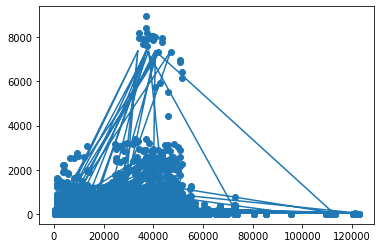

In [75]:
plt.scatter(X_train.iloc[:, 5], y_train)
plt.plot(X_test.iloc[:,5], y_pred_tree)

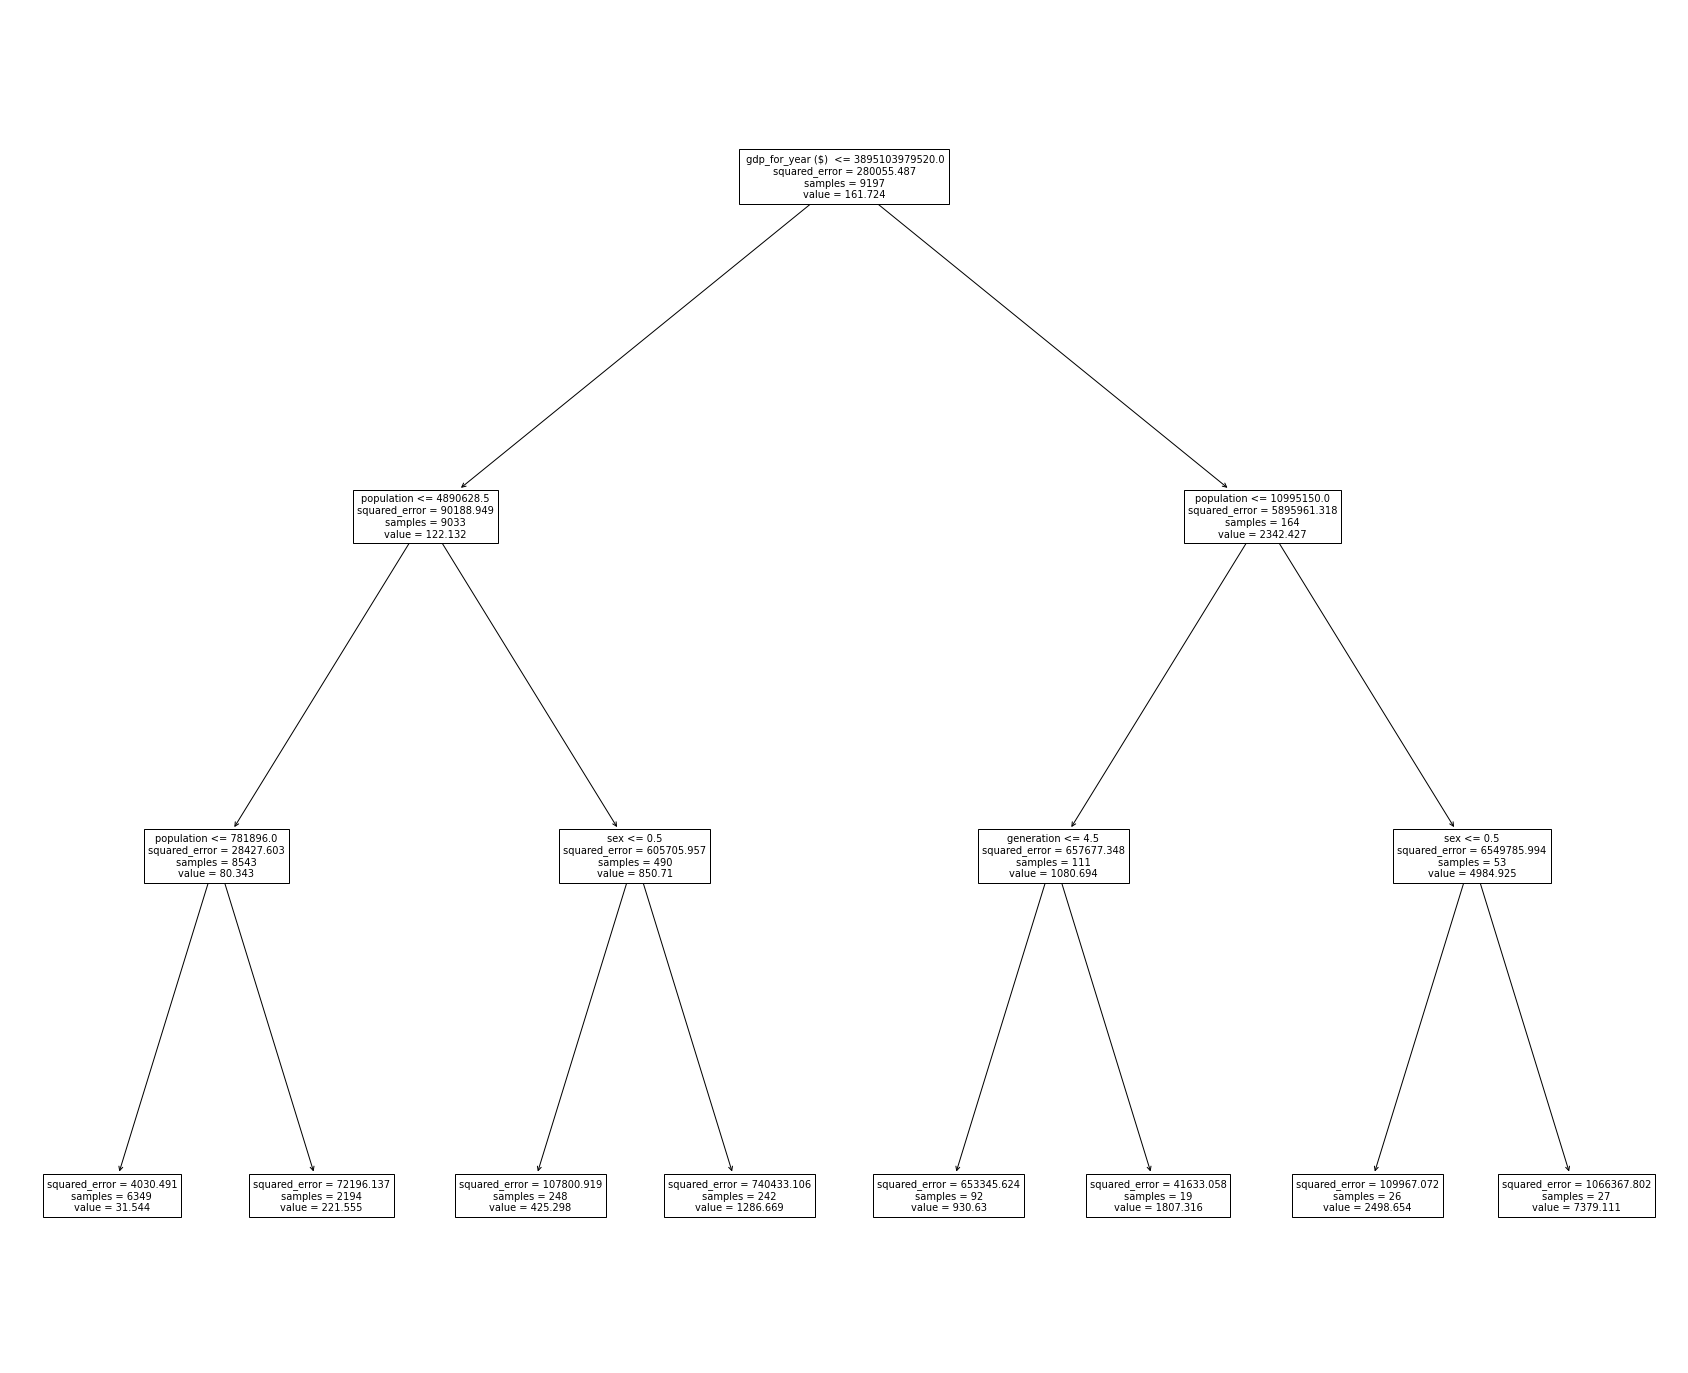

In [88]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(30, 25))
_ = plot_tree(tree, feature_names=X_train.columns, ax=ax)

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_depth=1)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [91]:
y_pred_tree1 = tree1.predict(X_test)

In [92]:
print(mean_squared_error(y_train, tree1.predict(X_train)))

193716.911313725


In [93]:
print(mean_squared_error(y_test, y_pred_tree1))

227488.23605594967


In [94]:
print("R Squared Error on Train ", r2_score(y_train, tree1.predict(X_train)))

R Squared Error on Train  0.30829096389063115


In [96]:
print("R Squared Error on test data", r2_score(y_test, y_pred_tree1))

R Squared Error on test data 0.32664336682745576


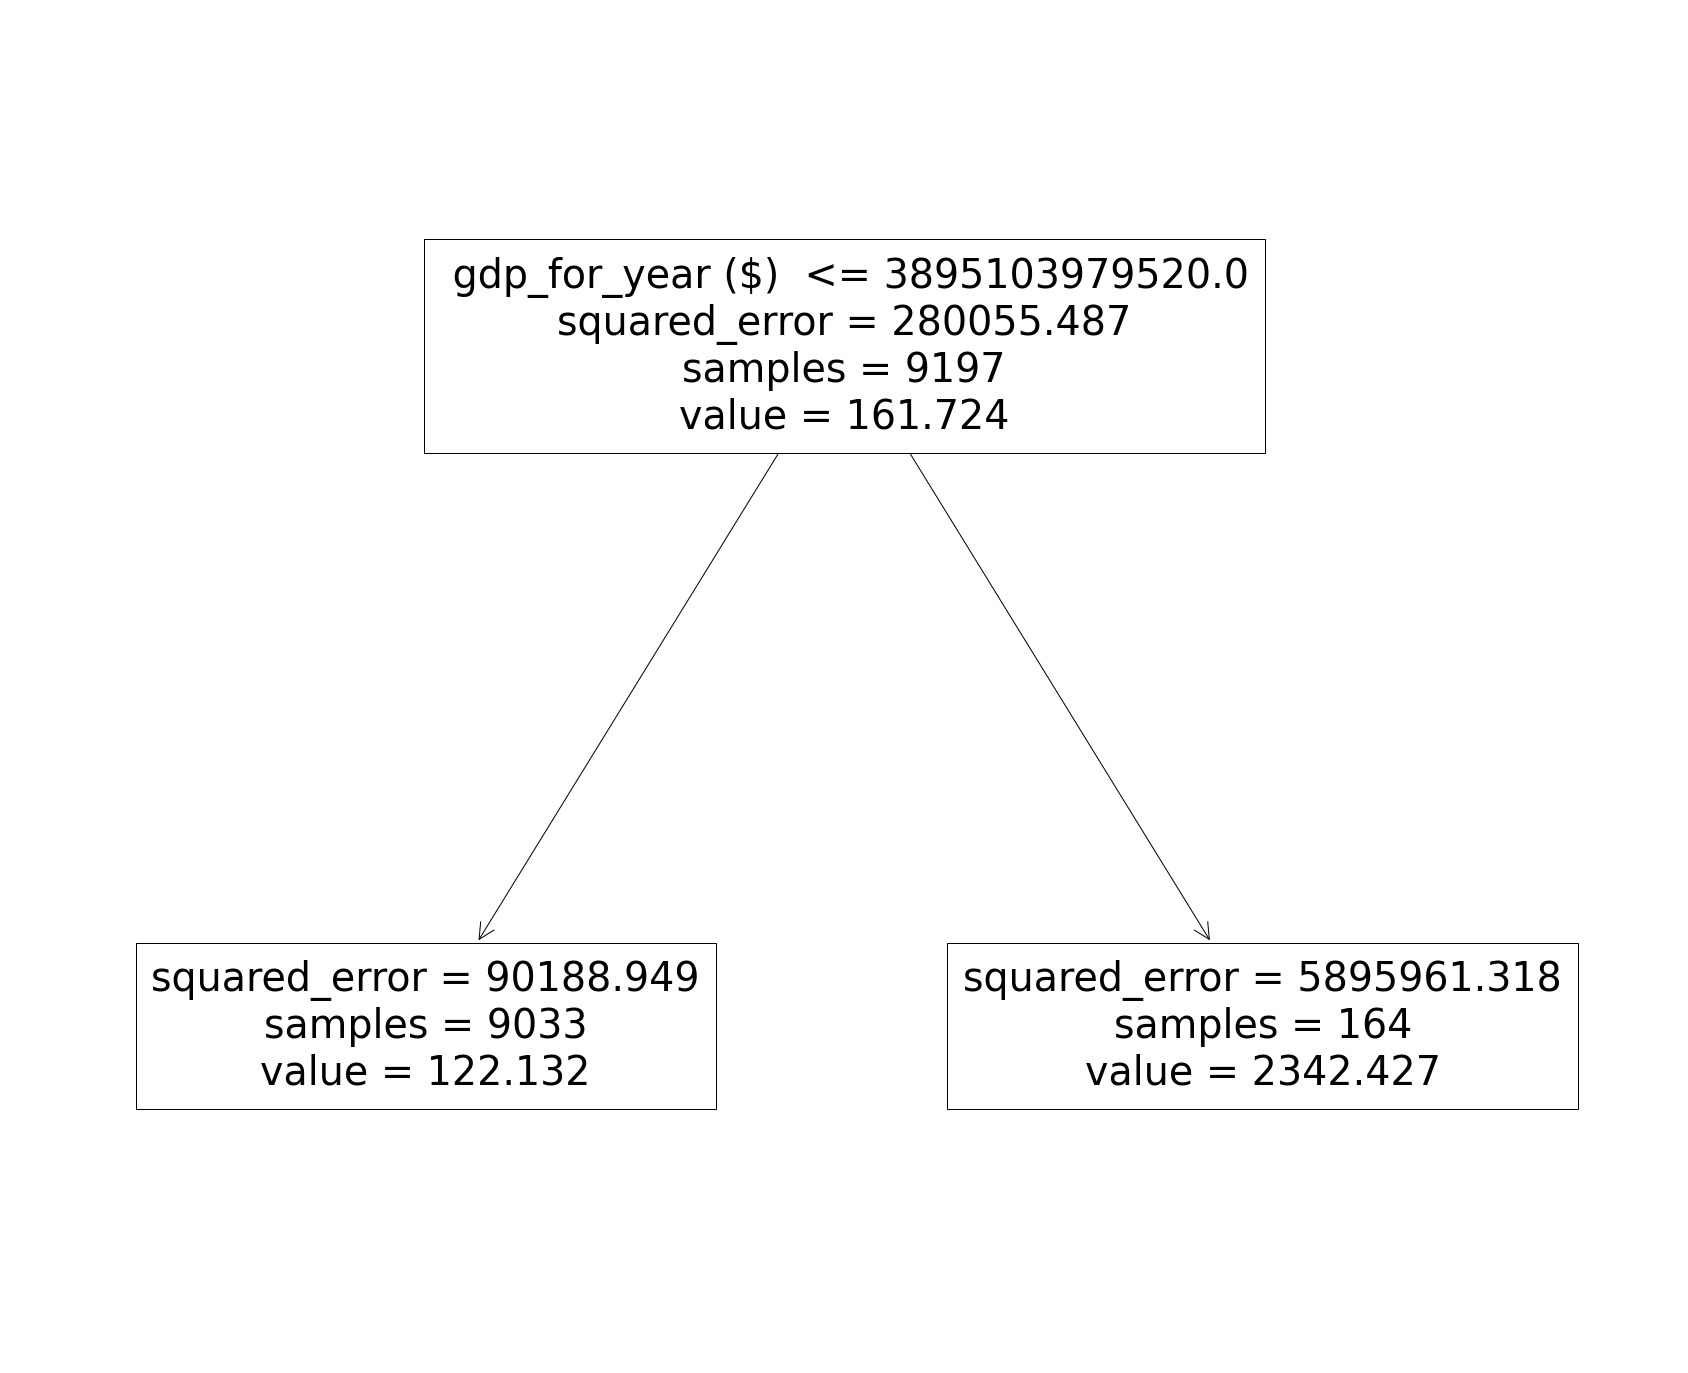

In [97]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(30, 25))
_ = plot_tree(tree1, feature_names=X_train.columns, ax=ax)